In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
booked_calls = pd.read_csv('data/Booked Calls.csv')
call_outcomes = pd.read_csv('data/Call Outcomes.csv')




call_outcomes.rename(columns={'Email Address': 'Email '}, inplace=True)


print(booked_calls.columns)
print(call_outcomes.columns)




Index(['Schedule Date', 'Appoinment Date', 'First Name', 'Last Name ',
       'Email ', 'Phone ', 'Closer', 'Source', 'Source - RR / FC',
       'Qualified?', 'Outcome Documented?', 'Showed?', 'Close / No Close',
       'Call Outcome ', 'Lost Reason', 'Deposit Amount', 'Payment Plan',
       'Cash Collected ', 'Revenue', 'Product', 'Call Recording Link',
       'Notes'],
      dtype='object')
Index(['Date', 'First Name', 'Last Name', 'Email ', 'Closer', 'Call Outcome ',
       'Showed?', 'Lost Reason', 'Deposit Amount', 'Payment Plan',
       'Cash Collected ', 'Revenue', 'Product', 'Call Recording Link',
       'Notes'],
      dtype='object')


In [51]:
#get rnr leads from booked calls

matcher = booked_calls["Source"].str.contains(r"(rnr|imran|rr)", case=False, na=False)
rnr_leads = booked_calls.loc[matcher]


merged = pd.merge(rnr_leads, call_outcomes, on="Email ", how="left")
merged.drop(columns=["Appoinment Date","Schedule Date","First Name_y","Last Name","Product_y"], inplace=True)

print(merged.columns)


won = merged[merged["Call Outcome _y"].str.contains("Won", case=False, na=False)]

total_cash_collected = won["Cash Collected _y"].sum()

print(total_cash_collected)

total_revenue = won["Revenue_y"].sum()
print(total_revenue)

rnr_leads.to_csv("output/rnr_leads.csv", index=False)
merged.to_csv("output/rnr_leads_merged.csv", index=False)
won.to_csv("output/rnr_leads_won.csv", index=False)









Index(['First Name_x', 'Last Name ', 'Email ', 'Phone ', 'Closer_x', 'Source',
       'Source - RR / FC', 'Qualified?', 'Outcome Documented?', 'Showed?_x',
       'Close / No Close', 'Call Outcome _x', 'Lost Reason_x',
       'Deposit Amount_x', 'Payment Plan_x', 'Cash Collected _x', 'Revenue_x',
       'Product_x', 'Call Recording Link_x', 'Notes_x', 'Date', 'Closer_y',
       'Call Outcome _y', 'Showed?_y', 'Lost Reason_y', 'Deposit Amount_y',
       'Payment Plan_y', 'Cash Collected _y', 'Revenue_y',
       'Call Recording Link_y', 'Notes_y'],
      dtype='object')
€1,000.00€3,500.00€100.00€750.00€1,500.00€750.00€1,500.00€250.00
$1,500.00€3,500.00€200.00€1,500.00€1,500.00€1,500.00€1,500.00€3,500.00


C:\Users\syeda\AppData\Local\Temp\ipykernel_9184\3838624253.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matcher = booked_calls["Source"].str.contains(r"(rnr|imran|rr)", case=False, na=False)


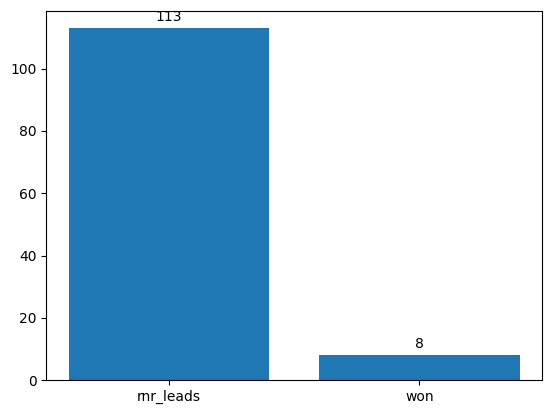

In [43]:
fig, ax = plt.subplots()
counts = [len(rnr_leads), len(won)]
bars = ax.bar(["rnr_leads", "won"], counts)
ax.bar_label(bars, fmt='%d', padding=3)
plt.show()